In [1]:
# chapter 7-1 pandasとmatplotlibを使った探索的データ分析

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 70 columns):
year                                     1179 non-null int64
tournament                               1179 non-null object
start date                               1179 non-null object
type                                     1179 non-null object
surface                                  1179 non-null object
draw                                     1179 non-null object
atp points                               1139 non-null object
atp ranking                              1177 non-null float64
tournament prize money                   1170 non-null object
round                                    1179 non-null object
opponent                                 1179 non-null object
ranking                                  1105 non-null object
score                                    1179 non-null object
stats link                               1179 non-null object
tournament.1             

In [5]:
df['win'] = df['winner'] == player
df['win'].tail() 

1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

In [6]:
print(("{player} has won {vic:.0f}% of his ATP matches.").format(player=player, vic=100*df['win'].mean()))

Roger Federer has won 82% of his ATP matches.


In [7]:
date = pd.to_datetime(df['start date'])

In [8]:
df['dblfaults'] = (df['player1 double faults'] / df['player1 total points total'])

In [9]:
df['dblfaults'].tail()

1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: dblfaults, dtype: float64

In [10]:
df['dblfaults'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64

In [11]:
df.groupby('surface')['win'].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [12]:
gb = df.groupby('year')

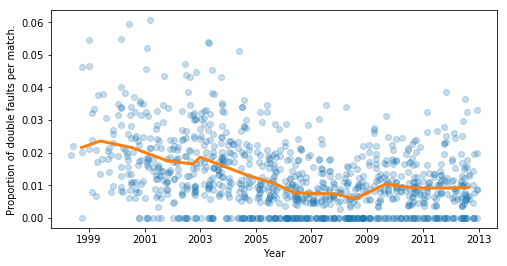

In [13]:
plt.figure(figsize=(8, 4))
plt.plot_date(date.astype(datetime), df['dblfaults'], alpha=.25, lw=0);
plt.plot_date(gb['start date'].max(),  gb['dblfaults'].mean(), '-', lw=3);
plt.xlabel('Year');
plt.ylabel('Proportion of double faults per match.');

In [14]:
# 7-2 はじめての統計的仮説検定 : 簡単なZ検定

In [15]:
import numpy as np
import scipy.stats as st
import scipy.special as sp

In [16]:
n = 100 # コイントスの回数
h = 61 # 表が出た回数
q = .5 # 帰無仮説（コインに歪みがない）

In [17]:
xbar = float(h)/n
z = (xbar - q) * np.sqrt(n / (q*(1-q))); z # Zスコア

2.1999999999999997

In [18]:
pval = 2 * (1 - st.norm.cdf(z)); pval # p値

0.02780689502699718

In [19]:
# chapter 7-3 はじめてのベイズ法

In [20]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
posterior = lambda n ,h, q: ((n+1) * st.binom(n, q).pmf(h))

In [22]:
n = 100
h = 61
q = np.linspace(0., 1., 1000)
d = posterior(n, h, q)

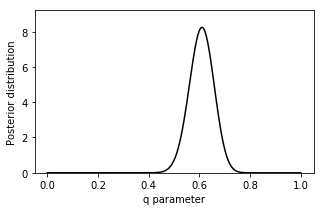

In [23]:
plt.figure(figsize=(5,3));
plt.plot(q, d, '-k');
plt.xlabel('q parameter');
plt.ylabel('Posterior distribution');
plt.ylim(0, d.max()+1);

In [24]:
# chapter 7-4 分割表とカイ二乗検定を用いた二変数間の相関検定

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)

In [27]:
print("Number of columns: " + str(len(df.columns)))
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",16.01.2012,GS
1175,2012,"Doha, Qatar",02.01.2012,250
1176,2012,"Doha, Qatar",02.01.2012,250
1177,2012,"Doha, Qatar",02.01.2012,250
1178,2012,"Doha, Qatar",02.01.2012,250


In [28]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

(0.0, 0.16293103448275861)

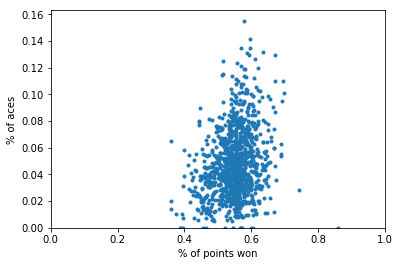

In [29]:
plt.plot(points, aces, '.')
plt.xlabel('% of points won')
plt.ylabel('% of aces')
plt.xlim(0., 1.)
plt.ylim(0.)

In [30]:
df_bis = pd.DataFrame({'points': points, 'aces':aces}).dropna()
df_bis.tail()

,aces,points
1173,0.024390,0.585366
1174,0.039855,0.471014
1175,0.046512,0.639535
1176,0.020202,0.606061
1177,0.069364,0.531792


In [31]:
df_bis.corr() # ピアソン相関係数を計算

,aces,points
aces,1.000000,0.255457
points,0.255457,1.000000


In [32]:
df_bis['result'] = df_bis['points'] > df_bis['points'].median()
df_bis ['manyaces'] = df_bis['aces'] > df_bis['aces'].median()

In [33]:
pd.crosstab(df_bis['result'], df_bis['manyaces']) # 4つの可能性(TrueとTrue、TrueとFalse等)それぞれの分割表

manyaces,False,True
result,,
False,300,214
True,214,299


In [34]:
st.chi2_contingency(_) # カイ二乗検定、2番目の値がp値

(27.809858855369555,
 1.3384233799633629e-07,
 1,
 array([[ 257.25024343,  256.74975657],
        [ 256.74975657,  256.25024343]]))

In [35]:
# chapter 7-5 最尤法を用いたデータへの確率分布のあてはめ

In [3]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = ds.heart.load_pandas().data

In [5]:
data.tail()

,survival,censors,age
64,14.0,1.0,40.3
65,167.0,0.0,26.7
66,110.0,0.0,23.7
67,13.0,0.0,28.9
68,1.0,0.0,35.2


In [7]:
data = data[data.censors==1]
survival = data.survival

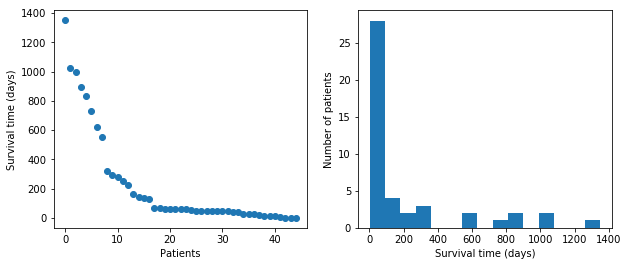

In [11]:
plt.figure(figsize=(10,4));
plt.subplot(121);
plt.plot(sorted(survival)[::-1], 'o');
plt.xlabel('Patients');
plt.ylabel('Survival time (days)');
plt.subplot(122);
plt.hist(survival, bins=15);
plt.xlabel('Survival time (days)');
plt.ylabel('Number of patients');

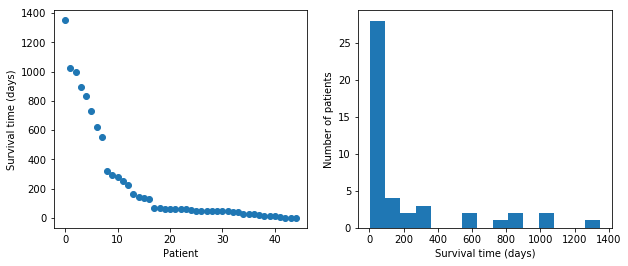

In [12]:
smean = survival.mean()
rate = 1./smean

In [13]:
smax = survival.max()
days = np.linspace(0., smax, 1000)
dt = smax / 999. # ビンの大きさ: 連続した2つのdaysの値の間隔

In [14]:
dist_exp = st.expon.pdf(days, scale=1./rate)

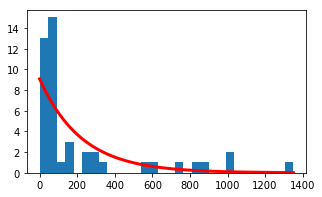

In [16]:
nbins = 30;
plt.figure(figsize=(5,3));
plt.hist(survival, nbins);
plt.plot(days, dist_exp*len(survival)*smax/nbins, '-r', lw=3);

In [17]:
dist = st.expon
args = dist.fit(survival); args

(0.99999999994836486, 222.28880590143666)

In [18]:
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.36199685486406347, pvalue=8.6470960143358866e-06)

In [19]:
dist = st.fatiguelife
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.18773446101946889, pvalue=0.073211497000863268)

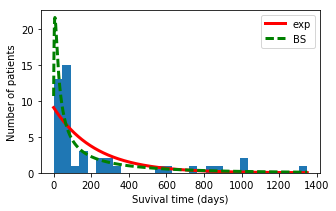

In [20]:
dist_fl = dist.pdf(days, *args)
nbins = 30
plt.figure(figsize=(5,3));
plt.hist(survival, nbins);
plt.plot(days, dist_exp*len(survival)*smax/nbins, '-r', lw=3, label='exp');
plt.plot(days, dist_fl*len(survival)*smax/nbins, '--g', lw=3, label='BS');
plt.xlabel('Suvival time (days)');
plt.ylabel('Number of patients');
plt.legend();

In [22]:
# chapter 7-6 カーネル密度推定によるノンパラメトリックな確率密度の推定

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
df = pd.read_csv("data/Allstorms.ibtracs_wmo.v03r05.csv")

In [3]:
df[df.columns[[0,1,3,8,9]]].head()

,Serial_Num,Season,Basin,Latitude,Longitude
0,1848011S09080,1848,SI,-8.6,79.8
1,1848011S09080,1848,SI,-9.0,78.9
2,1848011S09080,1848,SI,-10.4,73.2
3,1848011S09080,1848,SI,-12.8,69.9
4,1848011S09080,1848,SI,-13.9,68.9


In [5]:
dfs = df.groupby('Serial_Num')
pos = dfs[['Latitude', 'Longitude']].mean()
y, x = pos.values.T
pos.head()

,Latitude,Longitude
Serial_Num,,
1848011S09080,-15.918182,71.854545
1848011S15057,-24.116667,52.016667
1848061S12075,-20.528571,65.342857
1851080S15063,-17.325000,55.400000
1851080S21060,-23.633333,60.200000


/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


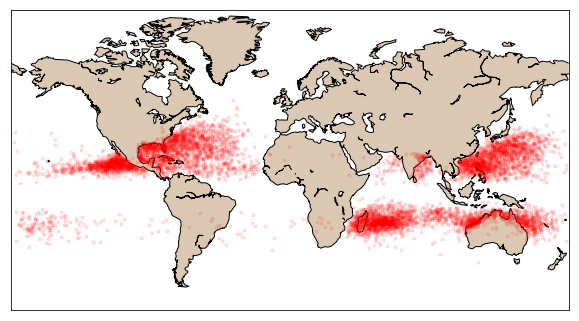

In [8]:
m = Basemap(projection='mill', llcrnrlat=-65, urcrnrlat=85, llcrnrlon=-180, urcrnrlon=180)
x0, y0 = m(-180, -65)
x1, y1 = m(180, 85)
plt.figure(figsize=(10,6))
m.drawcoastlines()
m.fillcontinents(color='#dbc8b2')
xm, ym = m(x, y)
m.plot(xm, ym, '.r', alpha=.1)

In [15]:
h = np.vstack((xm, ym))
kde = st.gaussian_kde(h)

In [16]:
k = 50
tx, ty = np.meshgrid(np.linspace(x0, x1, 2*k), np.linspace(y0, y1, k))
v = kde(np.vstack((tx.ravel(), ty.ravel()))).reshape((k, 2*k))

/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Really/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


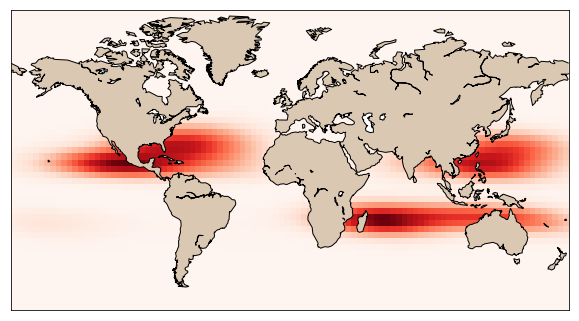

In [17]:
plt.figure(figsize=(10,6))
m.drawcoastlines()
m.fillcontinents(color='#dbc8b2')
xm, ym = m(x, y)
m.imshow(v, origin='lower', extent=[x0,x1,y0,y1], cmap=plt.get_cmap('Reds'))

In [18]:
# chapter 7-7 マルコフ連鎖モンテカルロ法を使った事後分布サンプリングからのベイズモデルあてはめ

In [2]:
import numpy as np
import pandas as pd
import pymc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/Allstorms.ibtracs_wmo.v03r05.csv", delim_whitespace=False)

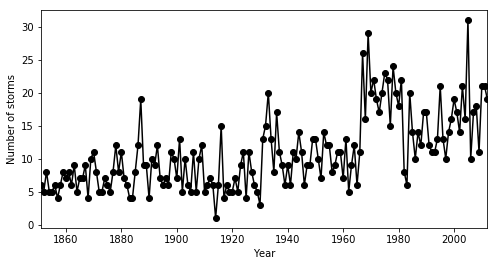

In [4]:
cnt = df[df['Basin'] == ' NA'].groupby('Season')['Serial_Num'].nunique()
years = cnt.index
y0, y1 = years[0], years[-1]
arr = cnt.values
plt.figure(figsize=(8,4));
plt.plot(years, arr, '-ok')
plt.xlim(y0, y1)
plt.xlabel("Year")
plt.ylabel("Number of storms")

In [5]:
switchpoint = pymc.DiscreteUniform('switchpoint', lower=0, upper=len(arr))
early_mean = pymc.Exponential('early_mean', beta=1)
late_mean = pymc.Exponential('late_mean', beta=1)

In [7]:
@pymc.deterministic(plot=False)
def rate(s=switchpoint, e=early_mean, l=late_mean):
    out = np.empty(len(arr))
    out[:s] = e
    out[s:] = l
    return out

In [12]:
storms = pymc.Poisson('storms', mu=rate, value=arr, observed=True)

In [13]:
model = pymc.Model([switchpoint, early_mean, late_mean, rate, storms])

In [17]:
mcmc = pymc.MCMC(model)
mcmc.sample(iter=10000, burn=1000, thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 2.8 sec

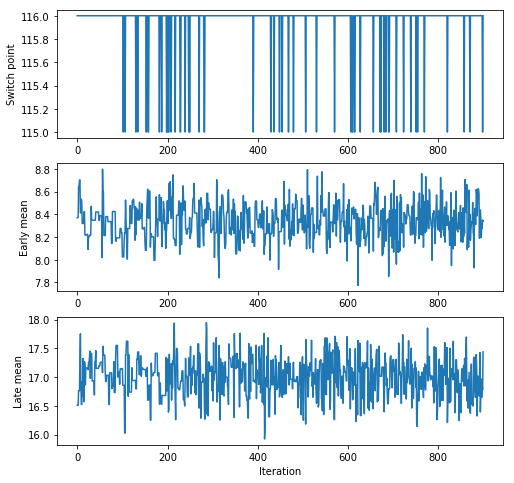

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(311);
plt.plot(mcmc.trace('switchpoint')[:]);
plt.ylabel("Switch point"); 
plt.subplot(312);
plt.plot(mcmc.trace('early_mean')[:]);
plt.ylabel("Early mean");
plt.subplot(313);
plt.plot(mcmc.trace('late_mean')[:]);
plt.xlabel("Iteration");
plt.ylabel("Late mean");

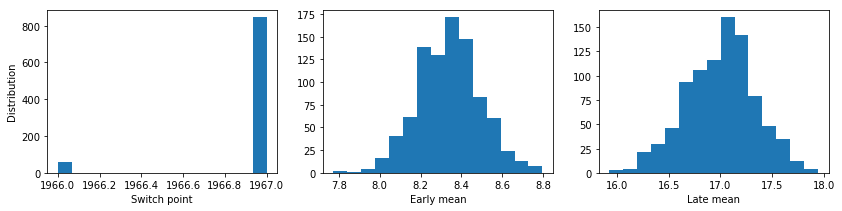

In [20]:
plt.figure(figsize=(14,3))
plt.subplot(131);
plt.hist(mcmc.trace('switchpoint')[:] + y0, 15);
plt.xlabel("Switch point")
plt.ylabel("Distribution")
plt.subplot(132);
plt.hist(mcmc.trace('early_mean')[:], 15);
plt.xlabel("Early mean");
plt.subplot(133);
plt.hist(mcmc.trace('late_mean')[:], 15);
plt.xlabel("Late mean");

In [ ]:
# chapter 7-8 IPython notebook上のプログラミング言語Rによるデータ分析

In [2]:
import statsmodels.datasets as sd

In [3]:
data = sd.longley.load_pandas()

In [5]:
%load_ext rpy2.ipython

In [6]:
data.endog_name, data.exog_name

('TOTEMP', ['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR'])

In [7]:
y, x = data.endog, data.exog

In [8]:
x['TOTEMP'] = y

In [9]:
x

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0,60323.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0,61122.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0,60171.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0,61187.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0,63221.0
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0,63639.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0,64989.0
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0,63761.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0,66019.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0,67857.0


In [11]:
gnp = x['GNP']
totemp = x['TOTEMP']

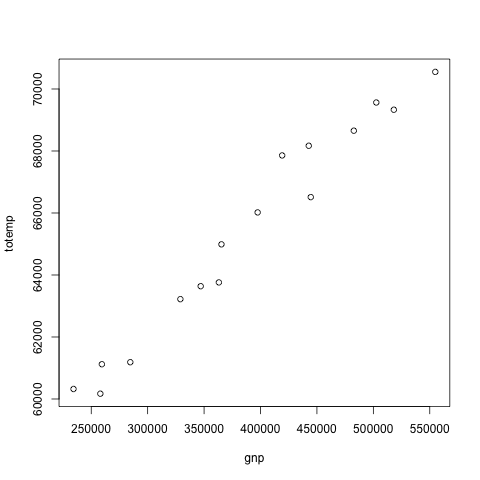

In [12]:
%R -i totemp,gnp plot(gnp, totemp)

 (Intercept)          gnp 
5.184359e+04 3.475229e-02 


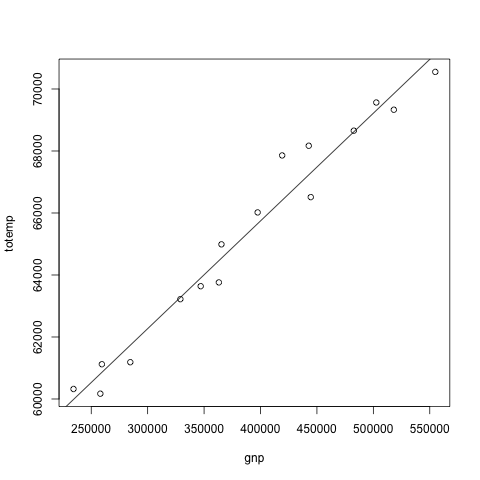

In [13]:
%%R
# 最小二乗回帰
fit <- lm(totemp ~ gnp);
# 回帰係数を表示
print(fit$coefficients)
plot(gnp, totemp) # データポイントをプロット
abline(fit) # 回帰直線を加える